<a href="https://colab.research.google.com/github/aioshi21chowdhury/learn-fireduck/blob/main/bogathon(ecommerce).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#pandas performance

In [21]:
!pip install Faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.7 MB/s eta 0:00:00


In [22]:
import pandas as pd
from faker import Faker

In [27]:
#import pandas as pd
import time
from faker import Faker
import random

# Load the Dataset
start = time.time()
#df_pd = pd.read_csv("ecommerce-data.csv", encoding="ISO-8859-1")  # Handling special characters
print("Data Loaded in", time.time() - start, "seconds")

# Expand Dataset by Duplication (20x size)
start = time.time()
big_df = pd.concat([df_pd for _ in range(20)], ignore_index=True)
print("Dataset Expanded in", time.time() - start, "seconds")

# Drop Unnecessary Columns
start = time.time()
df_pd = df_pd.drop(columns=["congestion_surcharge", "airport_fee"], errors='ignore')
print("Columns Dropped in", time.time() - start, "seconds")

# Sorting Performance
start = time.time()
df_sorted = df_pd.sort_values(by="UnitPrice").reset_index(drop=True)
print("Sorting Completed in", time.time() - start, "seconds")

# Grouping and Aggregation
start = time.time()
df_mean_price = big_df.groupby("StockCode")["UnitPrice"].mean().reset_index()
print("Grouping Completed in", time.time() - start, "seconds")

# Generating Fake Data
start = time.time()
fake = Faker()
num_rows = 250_000
data = {
    'ID': [fake.uuid4() for _ in range(num_rows)],
    'Name': [fake.name() for _ in range(num_rows)],
    'Company_Name': [fake.company() for _ in range(num_rows)],
    'City': [fake.city() for _ in range(num_rows)],
    'Country': [fake.country() for _ in range(num_rows)],
}
df_fake = pd.DataFrame(data)
print("Fake Data Generated in", time.time() - start, "seconds")

# Transform High-Cardinality Columns
start = time.time()
df_transformed = df_fake.copy()
for column in df_transformed.columns:
    df_transformed[column] = df_fake[column].str[::-1]  # Reverse strings
print("String Transformation Completed in", time.time() - start, "seconds")

# Expanding and Saving Dataset
start = time.time()
df_combined = pd.concat([df_fake, df_transformed], axis=0, ignore_index=True)
df_combined.to_csv('combined_dataset.csv', index=False)
df_combined.to_parquet('combined_dataset.parquet', index=False)
print("Dataset Saved in", time.time() - start, "seconds")


Data Loaded in 4.363059997558594e-05 seconds
Dataset Expanded in 1.2068984508514404 seconds
Columns Dropped in 0.019129514694213867 seconds
Sorting Completed in 0.1342329978942871 seconds
Grouping Completed in 1.3502075672149658 seconds
Fake Data Generated in 106.0771107673645 seconds
String Transformation Completed in 0.8640601634979248 seconds
Dataset Saved in 3.0465197563171387 seconds


#fireducks

In [1]:
# Install dependencies
!pip install kagglehub fireducks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 14.9 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0


In [2]:

# Load required libraries
import kagglehub
import pandas as pd
import fireducks.pandas as fpd
import time

In [ ]:
# Download the dataset
path = "/content/data.csv"

print("Path to dataset files:", path)

In [3]:
# Set FireDucks to Benchmark Mode
from fireducks.core import get_fireducks_options
get_fireducks_options().set_benchmark_mode(True)

In [4]:
# Set FireDucks to Benchmark Mode
from fireducks.core import get_fireducks_options
get_fireducks_options().set_benchmark_mode(True)



Path to dataset files: /content/data.csv


In [8]:

# Read the CSV file (using both Pandas and FireDucks for comparison)
start = time.time()
df_pd = pd.read_csv(path , encoding="ISO-8859-1")  # Use ISO encoding for special characters
df_fd = fpd.read_csv(path , encoding="ISO-8859-1")

print("Data Loaded in", time.time() - start, "seconds")

Data Loaded in 2.8884501457214355 seconds


In [11]:
# Benchmark File I/O performance
print("\n📌 **File I/O Performance**")
%timeit pd.read_csv(path , encoding="ISO-8859-1")
%timeit fpd.read_csv(path , encoding="ISO-8859-1")


📌 **File I/O Performance**
807 ms ± 18.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.22 s ± 215 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
# Check dataset information
df_pd.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 193.8 MB


In [13]:
# Drop unnecessary columns
df_pd.drop(columns=["InvoiceNo", "CustomerID"], inplace=True)
df_fd.drop(columns=["InvoiceNo", "CustomerID"], inplace=True)

In [14]:
# Sorting based on 'UnitPrice'
df_sorted = df_pd.sort_values(by="UnitPrice").reset_index(drop=True)

In [15]:
# Aggregations: Group by 'Country'
df_mean_price = df_pd.groupby("Country")["UnitPrice"].mean().reset_index()
df_total_quantity = df_pd.groupby("Country")["Quantity"].sum().reset_index()

In [16]:

# Using FireDucks for aggregations
df_mean_price_fd = df_fd.groupby("Country").UnitPrice.mean().reset_index()
df_total_quantity_fd = df_fd.groupby("Country").Quantity.sum().reset_index()

In [17]:
# Benchmark Sorting
print("\n📌 **Sorting Performance**")
%timeit df_pd.sort_values(by="UnitPrice")%timeit df_fd.sort_values(by="UnitPrice")


📌 **Sorting Performance**
118 ms ± 7.92 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
191 ms ± 11.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
# Benchmark Aggregations
print("\n📌 **Aggregation Performance**")
%timeit df_pd.groupby("Country").UnitPrice.mean().reset_index()
%timeit df_fd.groupby("Country").UnitPrice.mean().reset_index()


📌 **Aggregation Performance**
46.6 ms ± 10.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
26.2 ms ± 4.51 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:

# Save results to CSV and Parquet
df_sorted.to_csv("ecommerce_sorted.csv", index=False)
df_mean_price.to_parquet("ecommerce_aggregated.parquet", index=False)

print("\n✅ Data Processing Completed!")



✅ Data Processing Completed!


#fireduck performance

In [35]:
import fireducks.pandas as fpd  # Import the pandas submodule from fireducks
import pandas as pd
import time

In [36]:

path = "/content/data.csv"

# Load Data using FireDucks
start = time.time()
df_fd = fpd.read_csv(path, encoding="ISO-8859-1")
print("Data Loaded in", time.time() - start, "seconds")

# Convert to Pandas for unsupported operations
df_fd_pd = df_fd.to_pandas()

# Dataset Expansion
start = time.time()
df_fd_pd = pd.concat([df_fd_pd] * 2)
print("Dataset Expanded in", time.time() - start, "seconds")

# Dropping Columns
start = time.time()
df_fd_pd.drop(columns=["Description"], inplace=True)
print("Columns Dropped in", time.time() - start, "seconds")

# Sorting
start = time.time()
df_fd_pd = df_fd_pd.sort_values(by=["InvoiceDate"])
print("Sorting Completed in", time.time() - start, "seconds")

# Grouping (Aggregation)
start = time.time()
df_fd_pd_grouped = df_fd_pd.groupby("Country")["Quantity"].sum()
print("Grouping Completed in", time.time() - start, "seconds")

# Fake Data Generation
start = time.time()
df_fd_pd["FakeColumn"] = np.random.randint(1, 100, df_fd_pd.shape[0])
print("Fake Data Generated in", time.time() - start, "seconds")

# String Transformation
start = time.time()
df_fd_pd["InvoiceNo"] = df_fd_pd["InvoiceNo"].astype(str) + "_FD"
print("String Transformation Completed in", time.time() - start, "seconds")

# Saving Dataset
start = time.time()
df_fd_pd.to_csv("fireducks_output.csv", index=False)
print("Dataset Saved in", time.time() - start, "seconds")


Data Loaded in 1.0338706970214844 seconds
Dataset Expanded in 0.03182506561279297 seconds
Columns Dropped in 0.14439773559570312 seconds
Sorting Completed in 1.7689001560211182 seconds
Grouping Completed in 0.1662464141845703 seconds
Fake Data Generated in 0.024537324905395508 seconds
String Transformation Completed in 0.2761561870574951 seconds
Dataset Saved in 5.282181262969971 seconds


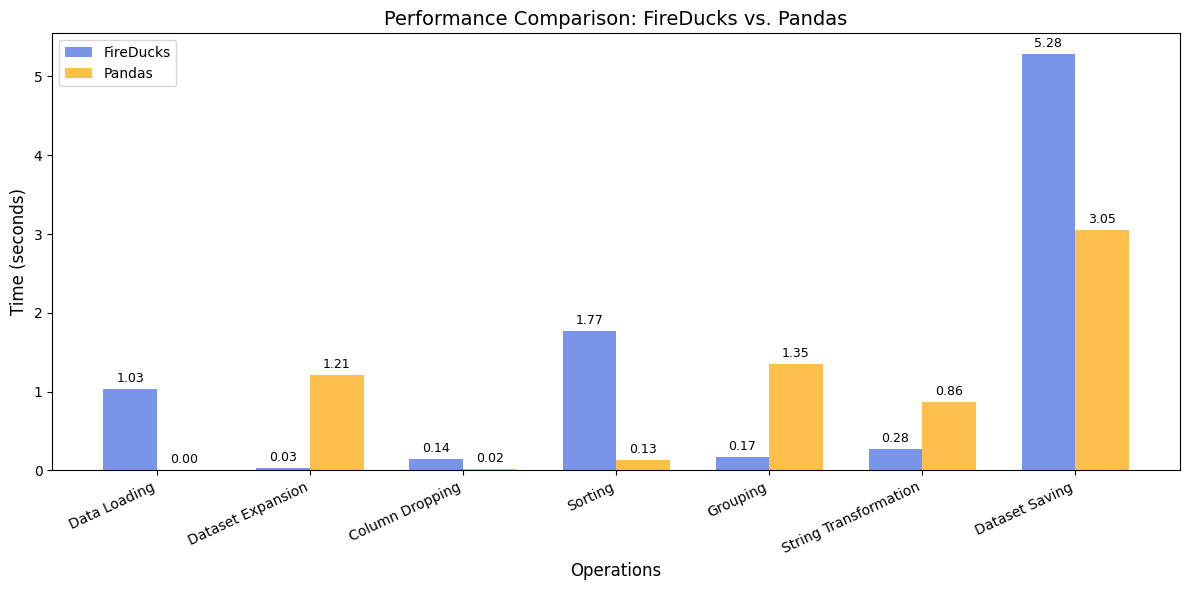

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Performance data
operations = [
    "Data Loading", "Dataset Expansion", "Column Dropping", "Sorting",
    "Grouping", "String Transformation", "Dataset Saving"
]
fireducks_times = [1.033, 0.0318, 0.144, 1.768, 0.166, 0.276, 5.282]
pandas_times = [0.0000436, 1.206, 0.0191, 0.134, 1.35, 0.864, 3.046]

# Set positions for bars
x = np.arange(len(operations))
width = 0.35  # Bar width

# Create bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for FireDucks and Pandas
bars1 = ax.bar(x - width/2, fireducks_times, width, label='FireDucks', color='royalblue', alpha=0.7)
bars2 = ax.bar(x + width/2, pandas_times, width, label='Pandas', color='orange', alpha=0.7)

# Labels and Title
ax.set_xlabel("Operations", fontsize=12)
ax.set_ylabel("Time (seconds)", fontsize=12)
ax.set_title("Performance Comparison: FireDucks vs. Pandas", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(operations, rotation=25, ha="right")
ax.legend()

# Display the values on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

# Show plot
plt.tight_layout()
plt.show()
